<a href="https://colab.research.google.com/github/queleandrade/CNN_classificacaoImagens/blob/main/Unidade_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lists all files in a given folder."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 95% 107M/113M [00:01<00:00, 123MB/s] 
100% 113M/113M [00:01<00:00, 89.6MB/s]


In [ ]:
print(files_in_photos)
print(len(files_in_photos))

['m-036-01.jpg', 'f-011-01.jpg', 'm-014-01.jpg', 'm-053-01.jpg', 'f1-012-01.jpg', 'f1-010-01.jpg', 'm-081-01.jpg', 'f-034-01.jpg', 'f-042-01.jpg', 'm1-026-01.jpg', 'f-026-01.jpg', 'm-051-01.jpg', 'm-093-01.jpg', 'f1-003-01.jpg', 'm1-005-01.jpg', 'm-031-01.jpg', 'f-029-01.jpg', 'm1-024-01.jpg', 'm-074-01.jpg', 'f-028-01.jpg', 'm-092-01.jpg', 'm-077-01.jpg', 'f-043-01.jpg', 'm-019-01.jpg', 'm-049-01.jpg', 'f-010-01.jpg', 'm1-009-01.jpg', 'f1-004-01.jpg', 'm-067-01.jpg', 'f-017-01.jpg', 'm-086-01.jpg', 'm-060-01.jpg', 'm-063-01.jpg', 'm-059-01.jpg', 'f-022-01.jpg', 'm-016-01.jpg', 'm1-002-01.jpg', 'm-048-01.jpg', 'm-096-01.jpg', 'm-085-01.jpg', 'm1-007-01.jpg', 'f-009-01.jpg', 'f1-008-01.jpg', 'm-042-01.jpg', 'm-012-01.jpg', 'm1-016-01.jpg', 'm1-031-01.jpg', 'm-047-01.jpg', 'm-021-01.jpg', 'm-011-01.jpg', 'm1-012-01.jpg', 'm-079-01.jpg', 'm-070-01.jpg', 'm-058-01.jpg', 'm-034-01.jpg', 'm-040-01.jpg', 'f1-001-01.jpg', 'm-075-01.jpg', 'm-095-01.jpg', 'm-054-01.jpg', 'f-012-01.jpg', 'f-033-0

# Preparação dos Dados

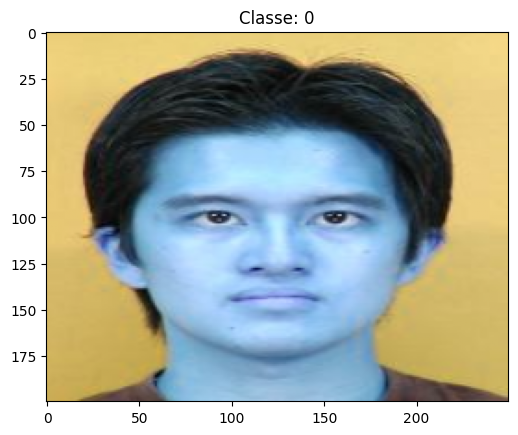

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_and_preprocess_images(photo_folder):
    photos = []
    labels = []

    file_list = os.listdir(photo_folder)

    for filename in file_list:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(photo_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (250, 200))
            img = img / 255.0
            photos.append(img)
            if 'm' in filename.lower():
                labels.append(0)
            elif 'f' in filename.lower():
                labels.append(1)

    photos = np.array(photos)
    labels = np.array(labels)

    return photos, labels

photos_folder = "photos"
X, y = load_and_preprocess_images(photos_folder)

plt.imshow(X[0])
plt.title(f"Classe: {y[0]}")
plt.show()


# Divisão do Conjunto de Dados

In [ ]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=23)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=23)

print(f"Treinamento: {X_train.shape[0]} imagens")
print(f"Validação: {X_val.shape[0]} imagens")
print(f"Teste: {X_test.shape[0]} imagens")


Treinamento: 94 imagens
Validação: 56 imagens
Teste: 38 imagens


# Arquitetura da Rede Neural Convolucional

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 250, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 124, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 122, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 85376)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,928,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,021,633 (42.04 MB)

 Trainable params: 11,021,633 (42.04 MB)

 Non-trainable params: 0 (0.00 B)

# Treinamento do Modelo

In [ ]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 9s/step - accuracy: 0.6906 - loss: 2.0466 - val_accuracy: 0.3036 - val_loss: 2.3284
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.3953 - loss: 1.8612 - val_accuracy: 0.6964 - val_loss: 0.6183
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.6700 - loss: 0.6092 - val_accuracy: 0.6964 - val_loss: 0.6759
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.6856 - loss: 0.6517 - val_accuracy: 0.7321 - val_loss: 0.5597
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.8041 - loss: 0.5319 - val_accuracy: 0.7321 - val_loss: 0.4920
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.7275 - loss: 0.4609 - val_accuracy: 0.8571 - val_loss: 0.4398
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.8868 - loss: 0.3850 - val_accuracy: 0.8571 - val_loss: 0.3936
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.9077 - loss: 0.2944 - val_accuracy: 0.8750 - val_loss: 0.3309
Epoch 9/

# Avaliação do Modelo

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.55      0.75      0.63         8

    accuracy                           0.82        38
   macro avg       0.74      0.79      0.75        38
weighted avg       0.85      0.82      0.83        38

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step


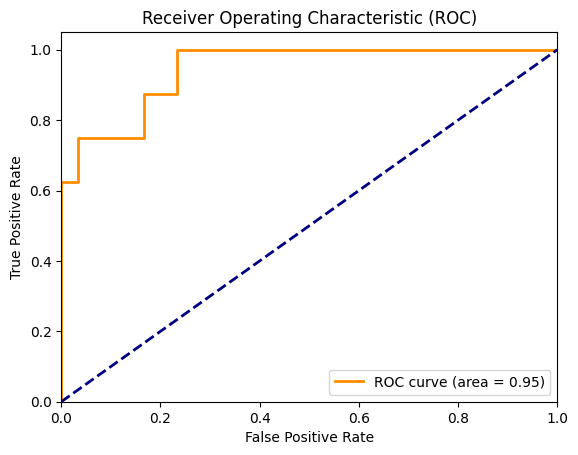

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# Análise das Imagens Mal Classificadas

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step
Total de imagens mal classificadas: 7


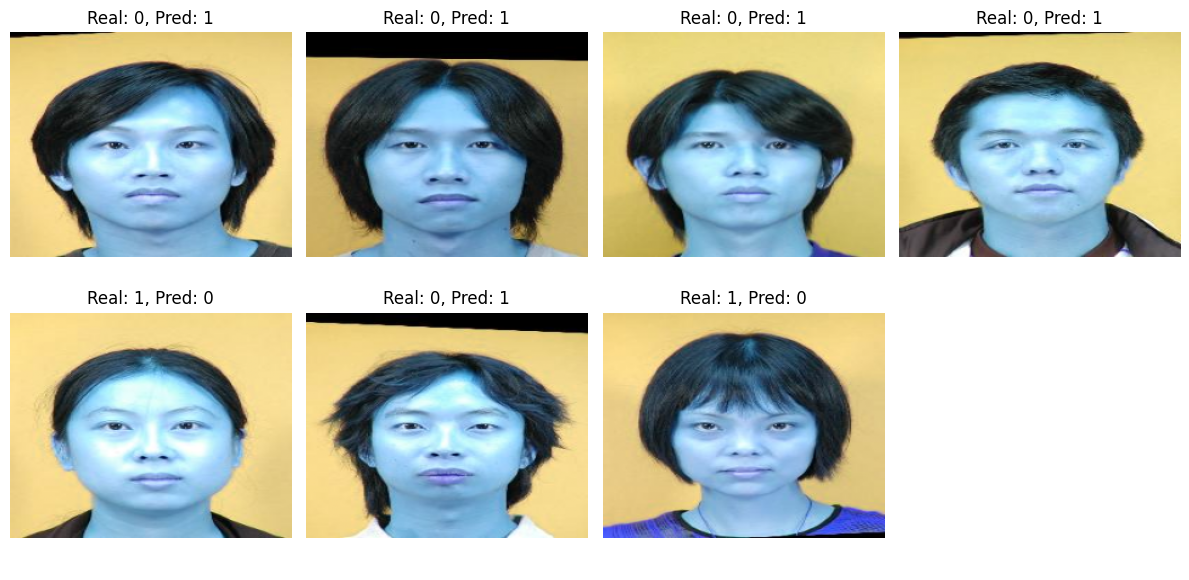

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

y_test = y_test.flatten()

misclassified_indices = np.where(y_pred != y_test)[0]

if len(misclassified_indices) > 0:
    print(f"Total de imagens mal classificadas: {len(misclassified_indices)}")

    num_columns = 4
    num_rows = int(np.ceil(len(misclassified_indices) / num_columns))
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 6))
    axes = axes.ravel()

    for i, idx in enumerate(misclassified_indices):
        axes[i].imshow(X_test[idx])
        axes[i].set_title(f"Real: {y_test[idx]}, Pred: {y_pred[idx]}")
        axes[i].axis('off')

    for j in range(len(misclassified_indices), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Não há imagens mal classificadas.")


